# 1. COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO.


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1t-Q7JllEobw8YwV3wcTuMA12J9JArfwp)

![alt text](https://drive.google.com/uc?id=1pNAshUhBxksQcrTfulYmUKXUPOmWbXb0)

# 2. IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS.

## 2.1 Instalar opencv-python.

In [1]:
# Solo se instala una vez, así que lo dejaré como comentario.
# !pip install opencv-python

## 2.2 Importe de librerías.

In [3]:
import os # librería sistema operativo
import cv2 # librería para tratar imágenes
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers # capas y optimizadores
from tensorflow.keras.applications.resnet50 import ResNet50 # red neuronal residual para facilitar el trabajo (con pesos ya entrenados y ya cargados)
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout # capas estándar para imágenes
from tensorflow.keras.models import Model, load_model # modelo y carga del modelo de tensorflow
from tensorflow.keras import backend as K # más adelante sabré para qué es
from tensorflow.keras.preprocessing.image import ImageDataGenerator # carga las imágenes en lotes desde la carpeta de trabajo para poder entrenar de grupo en grupo
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler # callbacks para seleccionar el mejor modelo de los epochs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## 2.3 Guardar la ubicación (directorio) de nuestras imágenes de entrenamiento. 

In [4]:
XRay_Directory = 'C:/Users/Danko/Dropbox/00 Programacion/00_portafolio/proyectos/04_proyecto_operations_department/Dataset'

In [5]:
## 2.4 Listar las carpetas de dicho directorio.

In [6]:
os.listdir(XRay_Directory)

['0', '1', '2', '3']

## 2.4 Cargar las imágenes con ImageGenerator.
#### ImageGenerator sirve para: 1. Cargar imágenes para generar datos de imágenes de tensores. 2. Normalizar las imágenes. 3. Realizar lotes de entrenamiento de 40 en 40 imágenes. 4. Usar el 20% de los datos para la validación cruzada posterior.

In [7]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# primer parametro para reescalar las imágenes y segundo parámetro para dividir entreno de testing
# usaremos mucho la validación cruzada para no tener problemas de over fitting

## 2.5 Definir el generador para entrenar y el generador para validar.

#### La función flow_from_directory sirve para no agregar todas las imagenes en memoria. Para esto creamos un flujo de datos para el entrenamiento y especificamos las condiciones para ir cargando las imágenes a tensorflow a medida que este las vaya necesitando para el proceso de validación.

In [8]:
train_generator = image_generator.flow_from_directory(batch_size= 40, directory= XRay_Directory, shuffle = True,
                                                     target_size = (256, 256), class_mode = 'categorical',
                                                     subset='training')
# Parámetros:
# 1. bach: cargamos las imágenes en lotes de 40 en 40 para la fase de entrenamiento.
# 2. directory: cargar el directorio.
# 3. shuffle: aleatorizar la muestra entre todas y cada una de las características que se quieran analizar entre las 4
# carpetas o categorías.
# 4. target: que todas las imágenes tengan el mismo tamaño.
# 5. class_model: explicita qué tipo de problema usaremos, puede ser "categorical", "binary", "sparse", "input" or None.
# Por default es "categorical". Determina el tipo de etiqueta de matriz que retornará.
# 6. subset: como cargaremos el subconjunto de entrenamiento y el de test con la misma función, especificaremos qué
# subset se usará

Found 428 images belonging to 4 classes.


In [9]:
train_generator = image_generator.flow_from_directory(batch_size= 40, directory= XRay_Directory, shuffle = True,
                                                     target_size = (256, 256), class_mode = 'categorical',
                                                     subset='validation')

Found 104 images belonging to 4 classes.


## 2.6 Generar un lote de 40 imágenes con sus etiquetas.

In [10]:
train_images, train_labels = next(train_generator)

In [11]:
train_images.shape

(40, 256, 256, 3)

In [12]:
train_labels.shape

(40, 4)

In [13]:
train_labels

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]],

In [14]:
# Traducción de cada Etiqueta
label_names = {0: 'COVID-19', 1: 'Normal', 2: 'Neumonía Vírica', 3: 'Neumonía Bacteriana'}

# 3. VISUALIZACIÓN DEL DATASET.

## 3.1 Matriz de 36 imágenes junto a sus etiquetas

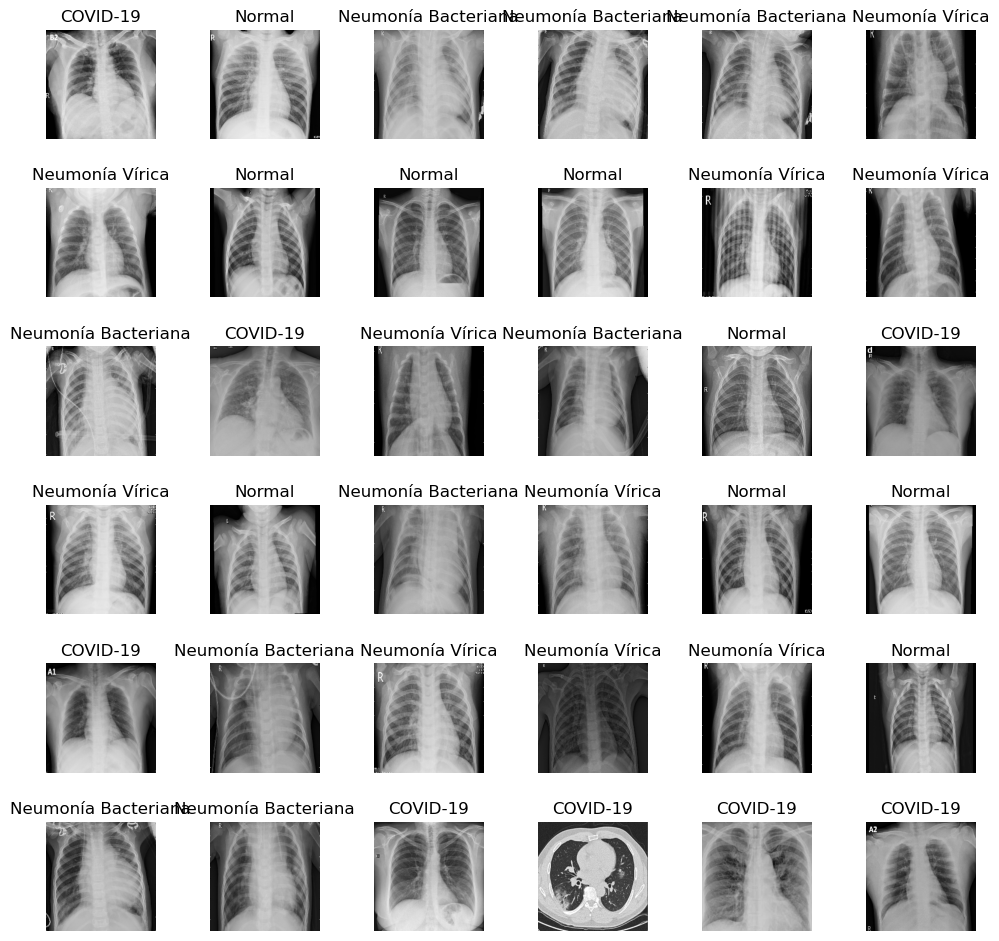

In [15]:
# mostraremos una matriz de las imágenes para que nuestro modelo pueda verlas y aprender de ellas
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12,12)) # figura y el eje mediante un sub-gráfico
axes = axes.ravel() # aplanamos el eje de dibujo para que se muestren las imágenes una detras de la otra
# asi al acceder a una posición mediante un bucle for, se ajustará para mostrar en forma de matriz bidimensional.
for i in np.arange(0,L*W):
    axes[i].imshow(train_images[i]) # pinta la imagen i-ésima
    axes[i].set_title(label_names[np.argmax(train_labels[i])]) # título desde las etiquetas label_names, usando
    # la función argmax, que me entrega la posición del valor más alto, es decir, el número uno que se encuetra
    # entre los tres ceros. 
    axes[i].axis('off') #borramos los ejes ya que no es un gráfico cartesiano.
    
    plt.subplots_adjust(wspace = 0.5) # ajusta el espaciado entre las imágenes

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRAS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=1e4bFs8Fh2Bp4ueRi9Q9SASRWZ2SwShJX)

![alt text](https://drive.google.com/uc?id=1zsKnK9bQVjUt5Z38gEK3qnIoafRR6i1c)

![alt text](https://drive.google.com/uc?id=1mL13x1d9uAItMFwtV_9r-fKqQp8DjfQo)

![alt text](https://drive.google.com/uc?id=1-se5iR8RsZ4Bold3MK60hDpL0qky7H97)

# TEORÍA #5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1ypOE6WINmjunchutKTSUbx4FCzuYUyqC)

![alt text](https://drive.google.com/uc?id=16Rhq_7flyuy5oS1vEJ7p3l1Y8irU7Zwg)

![alt text](https://drive.google.com/uc?id=1hCdV7lmgADpw8jV7nf0KO3mMzIMuMZDM)

![alt text](https://drive.google.com/uc?id=1gHDvwWJBBD5d94HPpSydQLb6pjTfknrK)

# TAREA #6: IMPORTAR EL MODELO DE RED NEURONAL CON PESOS PRE ENTRENADOS

In [16]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape = (256, 256, 3)))
# INSTANCIA: resnet50
# Pesos que usaremos: weights = 'el nombre del peso del modelo preentrenado'
# No incluiremos los de entrada ni la salida de esta red neuronal: include_top = False (NO entrada)
# Incluiremos la entrada: input_tensor = Input(shape = (256, 256, 3))

94765736/94765736 [==============================] - 49s 1us/step


In [17]:
# revisamos
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [18]:
# Hay que congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5
# para que las ultimas capas se ajusten para poder llevar a cabo en el problema que me ocupa. 
for layer in basemodel.layers[:-10]:
    layer.trainable = False

# TAREA #7: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [20]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation= 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation= 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [26]:
model.compile(loss = 'categorical_crossentropy', metrics =['accuracy'])

In [27]:
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Almacenar el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose = 1, save_beast_only = True)

In [28]:
train_generator = image_generator.flow_from_directory(batch_size=4, directory = XRay_Directory, shuffle = True, target_size=(256,256), class_mode= 'categorical', subset = 'training')
val_generator = image_generator.flow_from_directory(batch_size=4, directory = XRay_Directory, shuffle = True, target_size=(256,256), class_mode= 'categorical', subset = 'validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [31]:
history = model.fit_generator(train_generator, steps_per_epoch = train_generator.n//4, epochs = 10,
                             validation_data = val_generator, validation_steps = val_generator.n//4,
                             callbacks = [checkpointer, earlystopping])

C:\Users\Danko\AppData\Local\Temp\ipykernel_15492\4006429926.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = train_generator.n//4, epochs = 10,


Epoch 1/10
107/107 [==============================] - ETA: 0s - loss: 1.7714 - accuracy: 0.2150
Epoch 1: saving model to weights.hdf5
107/107 [==============================] - 139s 1s/step - loss: 1.7714 - accuracy: 0.2150 - val_loss: 1.5099 - val_accuracy: 0.2500
Epoch 2/10
107/107 [==============================] - ETA: 0s - loss: 1.4438 - accuracy: 0.2804
Epoch 2: saving model to weights.hdf5
107/107 [==============================] - 170s 2s/step - loss: 1.4438 - accuracy: 0.2804 - val_loss: 1.3114 - val_accuracy: 0.3077
Epoch 3/10
107/107 [==============================] - ETA: 0s - loss: 1.3487 - accuracy: 0.3271
Epoch 3: saving model to weights.hdf5
107/107 [==============================] - 139s 1s/step - loss: 1.3487 - accuracy: 0.3271 - val_loss: 1.6657 - val_accuracy: 0.2500
Epoch 4/10
107/107 [==============================] - ETA: 0s - loss: 1.1758 - accuracy: 0.4206
Epoch 4: saving model to weights.hdf5
107/107 [==============================] - 168s 2s/step - loss: 1.17

# TAREA #8: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

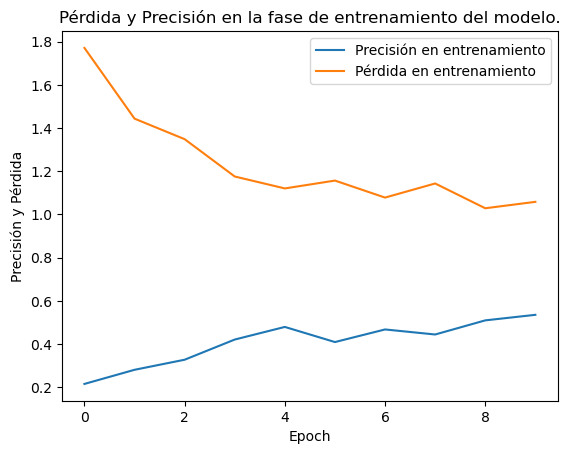

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Pérdida y Precisión en la fase de entrenamiento del modelo.')
plt.xlabel('Epoch')
plt.ylabel('Precisión y Pérdida')
plt.legend(['Precisión en entrenamiento','Pérdida en entrenamiento'])

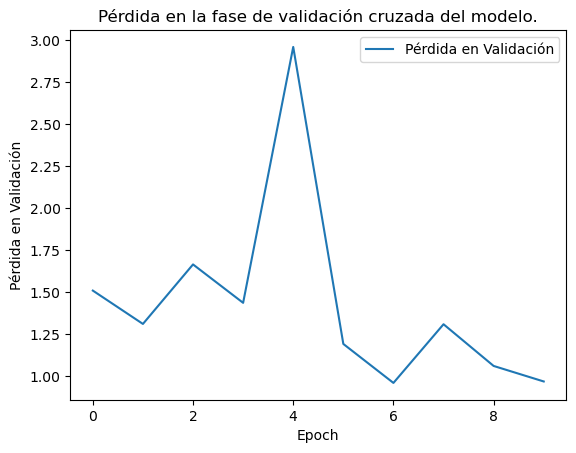

In [36]:
plt.plot(history.history['val_loss'])

plt.title('Pérdida en la fase de validación cruzada del modelo.')
plt.xlabel('Epoch')
plt.ylabel('Pérdida en Validación')
plt.legend(['Pérdida en Validación'])

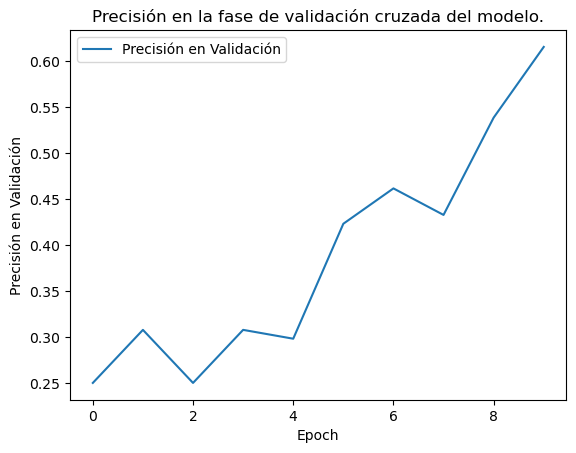

In [37]:
plt.plot(history.history['val_accuracy'])

plt.title('Precisión en la fase de validación cruzada del modelo.')
plt.xlabel('Epoch')
plt.ylabel('Precisión en Validación')
plt.legend(['Precisión en Validación'])

In [39]:
test_directory = 'C:/Users/Danko/Dropbox/00 Programacion/00_portafolio/proyectos/04_proyecto_operations_department/Test'

In [42]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_directory(batch_size = 40, directory = test_directory, shuffle = True,
                                             target_size = (256,256), class_mode = 'categorical')
evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose = 1)

print('Precisión en la fase de test: {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.


C:\Users\Danko\AppData\Local\Temp\ipykernel_15492\1538187663.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose = 1)


 1/10 [==>...........................] - ETA: 1:17 - loss: 0.9141 - accuracy: 0.7000WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.


10/10 [==============================] - 9s 17ms/step - loss: 0.9141 - accuracy: 0.7000
Precisión en la fase de test: 0.699999988079071


In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory,str(i))):
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img, (256, 256))
        image.append(img)
        img = img/255
        img = img.reshape(-1,256,256,3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

1/1 [==============================] - 3s 3s/step


In [45]:
len(original)

40

In [46]:
score = accuracy_score(original, prediction)
print('Eficacia de la predicción {}'.format(score))

Eficacia de la predicción 0.675


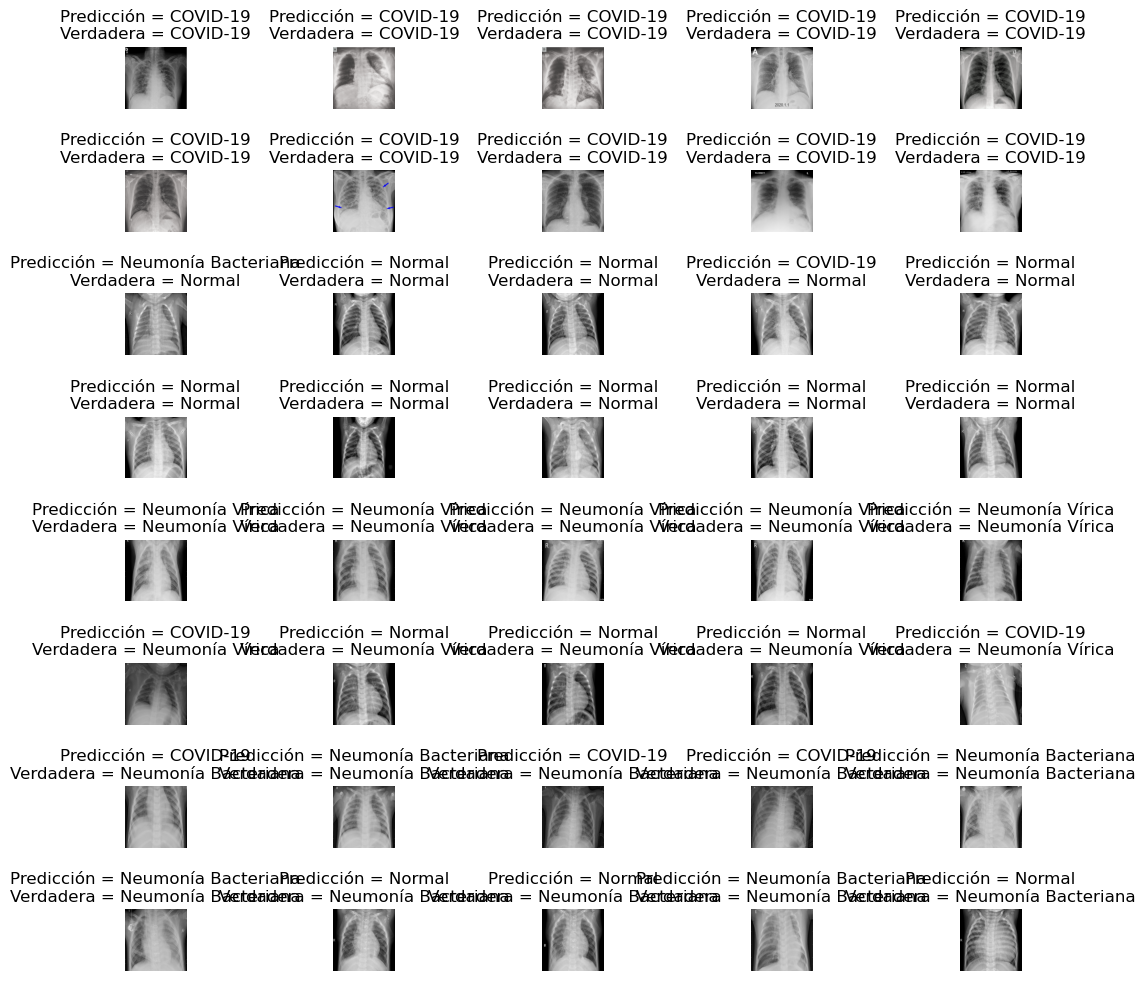

In [48]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Predicción = {}\nVerdadera = {}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1.2, hspace = 1)

In [49]:
print(classification_report(np.asarray(original),np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.57      0.80      0.67        10
           2       1.00      0.50      0.67        10
           3       0.80      0.40      0.53        10

    accuracy                           0.68        40
   macro avg       0.75      0.67      0.66        40
weighted avg       0.75      0.68      0.66        40



Text(0.5, 1.0, 'Matriz de confusión')

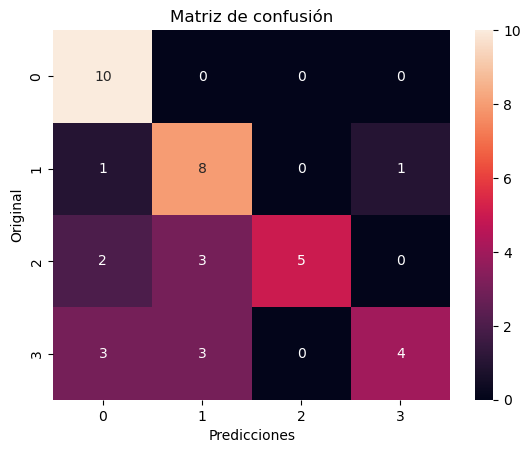

In [50]:
cm = confusion_matrix(np.asarray(original),np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicciones')
ax.set_ylabel('Original')
ax.set_title('Matriz de confusión')



# BUEN TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS NUEVAS HABILIDADES ADQUIRIDAS
